In [50]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime

Data = pd.read_csv('./archive/Airplane_Crashes_and_Fatalities_Since_1908.csv')

np.random.seed(42) 
obs, feat = Data.shape #in obs ho il numero di tuple mentre in feat ho il numero di colonne
Data.sample(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
4793,07/30/2001,16:00,"Haines, Alaska",Air Taxi,NaN,"Shagway, AK - Return",Piper PA-32-300,N39586,32-7840168,6.0,6.0,0.0,The sightseeing plane impacted the side of a m...
5020,11/28/2004,09:55,"Montrose, Colorado",Glow Air/Air Castle - Charter,73,"Montrose, CO - South Bend, IN",Canadair CL-601-2A12 Challenger,N873G,3009,6.0,3.0,0.0,"While attempting to take off from R31, the air..."
655,06/20/1944,NaN,"Porto Alegre, Brazil",Varig,NaN,NaN,Lockheed 10C Electra,PP-VAG,1008,10.0,10.0,0.0,Crashed into a river.
1874,10/09/1963,NaN,"Near Marseilles, France",Aeronaves de Panama,NaN,"Marseilles, France - Dhah, Saudi Arabia",Douglas C-74,HP-385,13915,6.0,6.0,0.0,Crashed shortly after taking off with a cargo ...
2318,06/05/1969,07:12,"North Bend, Oregon",Eureka Aero Inc. - Air Taxi,NaN,NaN,Cessna 337C,N2665S,NaN,3.0,3.0,0.0,Collided with trees on approach. Improper IFR ...


In [2]:
print(str("Dataset consist of " + str(obs) + " observations (crashes) and " + str(feat) + " features. Features are following:"))
i = 1
for col in Data.columns:
    print(i, " - " + col)
    i += 1

Dataset consist of 5268 observations (crashes) and 13 features. Features are following:
1  - Date
2  - Time
3  - Location
4  - Operator
5  - Flight #
6  - Route
7  - Type
8  - Registration
9  - cn/In
10  - Aboard
11  - Fatalities
12  - Ground
13  - Summary


In [3]:
Data.isnull().sum() #calculating missing values in rows

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [51]:
#cleaning up by replacing the old incorrect value time with the new one
Data['Time'] = Data['Time'].replace(np.nan, '00:00') 
Data['Time'] = Data['Time'].str.replace('c: ', '')
Data['Time'] = Data['Time'].str.replace('c:', '')
Data['Time'] = Data['Time'].str.replace('c', '')
Data['Time'] = Data['Time'].str.replace('12\'20', '12:20')
Data['Time'] = Data['Time'].str.replace('18.40', '18:40')
Data['Time'] = Data['Time'].str.replace('0943', '09:43')
Data['Time'] = Data['Time'].str.replace('22\'08', '22:08')
Data['Time'] = Data['Time'].str.replace('114:20', '14:20') #All 114:20 value are replaced with 14:20 value

Data['Time'] = Data['Date'] + ' ' + Data['Time'] #joining two rows (data and time)
def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M') #select the format to display
Data['Time'] = Data['Time'].apply(todate) #convert to date type
print('Date ranges from ' + str(Data.Time.min()) + ' to ' + str(Data.Time.max()))

Data.Operator = Data.Operator.str.upper() #just to avoid duplicates like 'British Airlines' and 'BRITISH Airlines'

Date ranges from 1908-09-17 17:18:00 to 2009-06-08 00:00:00


/tmp/ipykernel_2193/1499716032.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  Data['Time'] = Data['Time'].str.replace('18.40', '18:40')


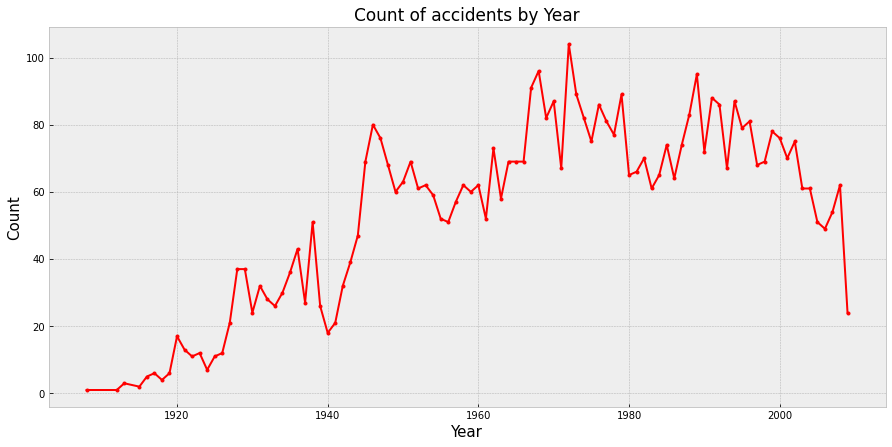

In [43]:
Temp = Data.groupby(Data.Time.dt.year)[['Date']].count() #Temp is going to be temporary data frame with only 1 column Date that contains, for every year, the counts of planes crashed
Temp = Temp.rename(columns={"Date": "Count"}) #Renaming the name of the only Date column into Count

plt.figure(figsize=(15,7))
plt.style.use('bmh')
plt.plot(Temp.index, 'Count', data=Temp, color='red', marker = ".", linewidth=2)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count of accidents by Year', loc='Center', fontsize=17)
plt.show()

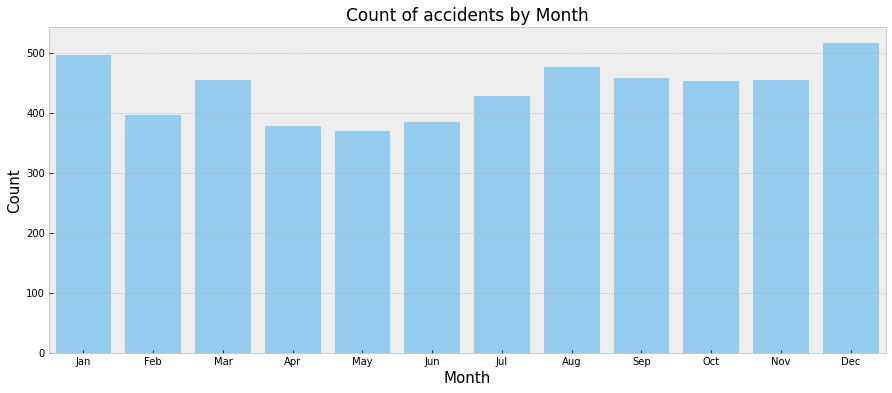

In [113]:
import matplotlib.pylab as pl

pl.figure(figsize=(15,6))
plt.style.use('seaborn-muted')
#print(Data.Time.dt.month) #From the date, get out the number of the month for each row
#print(Data.groupby(Data.Time.dt.month).count()) #Group the dataset by the month, adding Data, you select the data column 
sns.barplot(x = Data.groupby(Data.Time.dt.month)[['Date']].count().index, y = "Date", data=Data.groupby(Data.Time.dt.month)[['Date']].count(), color='lightskyblue')
plt.xticks(Data.groupby(Data.Time.dt.month)[['Date']].count().index - 1, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) #Given the array with the number of month label, the second one array substitute the first one with the name of the month
plt.xlabel('Month', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count of accidents by Month', loc='Center', fontsize=17)
plt.show()

